# Neural Networks at Their Core

## Introduction
In their most basic form, neural networks are simply a number of arrays (tensors in mathematical terms) connected by mathematical operations. Data is entered into the network at the beginning. From there the data flows through the network undergoing the mathematical operations dictated by the individual components of the network. When the data exits the network, the hope is that the resulting values have some useful meaning. 

In this notebook we will explore the fundamental elments of a neural network while building some simple image analysis networks. By the end of this notebook you should have a basic understanding of what a neural network is and how to construct neural networks from scratch.

## Neural networks are cakes?
The current terminology of neural network architecture describes networks as a series of layers. If you are a baker, it may help to picture a neural network as a cake. Each of them can be comprised of layers that when combined form the final product. Similarily each layer can have its own flavor which partially dictates the final entity. Just as a master baker carefully considers what layers should go into a cake based on the intended outcome, a data scientist must also thoughtfully choose the layers used to construct a neural network to obtain the best results.

### What makes a layer?
For the purposes of this notebook a layer will be defined as a distinct operation. This is admittedly a pretty loose definition, so we will examine a number of layers to provide a definition by example.

## The dense (or fully-connected) layer
We begin our study of neural network layers by examining the dense layer. Dense layers are perhaps the most basic neural network layer, and you are almost guaranteed to find at least one dense layer in any neural network. 

The key property of a dense layer is the number of neurons contained in the layer. Don't get caught up on the use of the term neuron, in simple terms all the number of neurons means is how many numbers the layer will output. Said differently, the number of neurons is the dimensionality of the output vector. If this is confusing, do not worry as it will become clearer when we run the code.

A dense layer has two important properties:
1. Weights
1. Bias

#### Weights
The weights of a layer are a tensor of values which dictate how a layer acts upon data that is input into the layer. If we make an analogy to a linear equation, the weights would be the slope of the line.

#### Bias
The bias provides an offset to the incoming data. Sticking with the linear equation analogy, the bias is similar to the intercept, a constant value that shifts the function.

In the following code we will define a simple neural network consisting of a single dense layer.

In [1]:
#first import some useful libraries
import mxnet as mx
import numpy as np
import requests
import skimage #scikit learn for image analysis
from skimage import io as imageIO #module used to load images need to change the name to avoid conflicts
from skimage import transform
import io #A python standard library for making in-memory objects that behave like files
import matplotlib.pyplot as plt #a plotting library to view the image with
%matplotlib inline

ImportError: No module named mxnet

The shape of our input image is:  (576, 1024, 3)


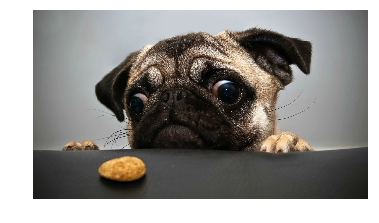

In [7]:
#get an image to work with as a test input
url = 'https://s3.us-east-2.amazonaws.com/mxnet-zoo/public/pug-cookie.jpg' #image location
r = requests.get(url) #perform an HTTP GET to obtain the image
if r.status_code == 200: #if the GET request is successful
    b = io.BytesIO(r.content) #store the image data in an io object
    img = imageIO.imread(b) #use PIL to open the .jpg image
    plt.imshow(img) #use matplotlib to display the image
    plt.axis('off') #tell matplotlib not to show graph axis
    print('The shape of our input image is: ', img.shape)

### Define a dense layer
The goal now is to define a dense layer that will take in an image of 250x250 pixels with 3 color channels and produce an output with two neurons.

In [8]:
#let's rescale the image to match our desired input shape
image = transform.resize(img, (250, 250), mode='constant')

#first lets prepare the image for input
#the secret here is that dense layers expect to have a 1-D arrays as their input
inData = np.array(image)
inData = inData.flatten()
print('250 * 250 * 3 = ', 250*250*3)
print(inData.shape)


def dense0(in_):
    weights = np.ones((2, in_.shape[0]))
    bias = np.zeros((2,))
    return np.dot(weights, in_) + bias
    
out_ = dense0(inData)
print("The ouptut of the dense layer is: ", out_)
print("The shape of the output is: ", out_.shape)

250 * 250 * 3 =  187500
(187500,)
The ouptut of the dense layer is:  [ 77443.37670657  77443.37670657]
The shape of the output is:  (2,)


### Understanding dense0
The layer dense0 (defined as a function above) takes in an image of dimension (250, 250, 3) which has been flattened to a 1-D array which we will call $x$. Due to the shape of the weights, the output of dense0 is a vector with two values. Recall the rules of matrix multiplication from linear algebra if it isn't obvious why this is the case. In mathematical notation, dense0 layer can be understood by the following:

$$
dense0\left(x\right) =  wx + b
$$

Here $w$ is the weights and $b$ is the bias. Writing this out in matrix notation would produce something like the following:

$$
dense0\left(x\right) =
\begin{bmatrix}
    w_{0,0} & w_{0,1} & \dots & w_{0,187499} \\
    w_{1,0} & w_{1,1} & \dots & w_{1,187499}\\
\end{bmatrix}
\begin{bmatrix}
    x_{0} \\
    x_{1} \\
    \dots \\
    x_{187499}
\end{bmatrix}
+
\begin{bmatrix}
    b_0 \\
    b_1
\end{bmatrix}
$$

There are some things that should be noted about our one layer neural network. First is the number of parameters in our very simple neural network. Every value in $w$ must be optimized along with the values in $b$. This means that there are 375,002 parameters to be optimized. This is a large number of parameters, and we only have a single layer in our very basic network. The large size of neural networks was one of the reasons they did not see widespread use until computational power increased. A second problem is that our single layer network is not actually capable of learning much information. To make a more powerful network we will need multiple layers.

### Create a two layer neural network
In the following cell create a two layer neural network comprised of two dense layers. The first dense layer should have 10 neurons, and the second dense layer should have one neuron. Initialize the parameters of the weight matrix to ones and the bias matrix to zeros for both layers.

#### Questions
1. How many parameters are in this two layer network?
1. What percentage of the parameters are in the first layer?
1. What primarily dictates the number of parameters in a layer?

In [9]:
#let's rescale the image to match our desired input shape
image = transform.resize(img, (250, 250), mode='constant')

inData = np.array(image)
inData = inData.flatten()

def dense0(in_):
    weights = np.ones(("enter the shape here"))
    bias = np.zeros(("enter the shape here"))
    return np.dot(weights, in_) + bias

def dense1(in_):
    """fill in the code for the second dense layer"""
    
result = dense0(inData)
result = dense1(result)
print(result)

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
The above output should be: 774433.76706573

### Activation Layers
The activation is arguably the most interesting layer in a nueral network. The activation layer is where we introduce non-linearity into the network. In theory the activation can be any static (usually non-linear) function, but in practice there are a select few funcitons which are commonly used:
* RELU $f\left(x\right) = max\left(0, x\right)$
* Sigmoid $f\left(x\right) = \frac{1}{1 + e^{-x}}$
* tanh
* softmax $f\left(x\right) = \frac{e^{z_j}}{\sum_k^K{e^{z_k}}}$

While the networks above did not include an activation layer, that is highly unusual. In paractice there is almost always an activation layer on top of every dense layer. This ensures that each layer can behave non-linearly.

### Implement an activation layer
In the cell below is code similar to the one layer dense network created above. Add an activation layer after the dense layer, and think about the following questions.

#### Questions
1. How can you rationalize the effect of the RELU function on the output of this network?
1. Should a RELU ever be used as the activation function for a neural network with image inputs?

In [28]:
image = transform.resize(img, (250, 250), mode='constant')

inData = np.array(image)
inData = inData.flatten()


def relu(in_):
    "Implement the RELU activation function here"

def dense0(in_):
    weights = np.ones((2, in_.shape[0]))
    bias = np.zeros((2,))
    return np.dot(weights, in_) + bias
    
out_ = dense0(inData)
out_ = relu(out_)
print("The ouptut of the dense layer is: ", out_)

The ouptut of the dense layer is:  [ 77443.37670657  77443.37670657]


## Convolutional layers
Convolutional layers are, to date, the essence of all modern computer vision techniques. To overstate their importance would be a difficult task. The convolutional layer has some similarities to the dense layer, so understanding the preceeding information should help in grasping convolutional layers. That being said, convolutional layers are tricky beasts. Do not be disheartened if it takes significant effort to fully understand convolutional layers.

In the following sections you will get a brief introduction to convolutional layers and even get the chance to attempt implementing your own basic convolutional layer.

### Basic idea&mdash;images are spatial
When we assess our surroundings using our eyes, we don't examine the world one point at a time. Instead we combine points together to form objects. The spatial nature of points in our vision is essential to navigating our world. The dense layers described above were unable to understand spatial connections in the way that the human brain does, and convolutional layers attempt to solve this problem. An added bennefit of convolutional layers is that they require fewer parameters than dense layers.

### What is a convolution?
A convolution is a measure of how similar two functions are to each other. While that definition may have some value, sometimes an image is worth a thousand words. The below animation should be worth at least a million words, right?

<div>
<img src="https://s3.us-east-2.amazonaws.com/mxnet-zoo/public/convgaus.gif">
<center>Credit Wolfram</center>
</div>

The above animation shows the convolution of two Gaussian functions represented by the red and blue traces. The green trace shows the convolution of the two functions. There are a few key takeaways from this animation:
1. Convolutions involve 'sliding' one function over the other
1. Convolutions measure the similarity of the functions
1. Convolutions maintian spatial information

For those who are mathematically inclined, the definition of a convoltuion $C$ between functions $f$ and $g$ is 
$$
C = \int_{-\infty}^{\infty}{f\left(\tau\right)g\left(t-\tau\right)d\tau}
$$



### Convolutions on images
In the previous section, convolutions were shown in terms of 1-D functions. We will now translate the idea to two dimensions. The reference function will be the input image, and we will define a second function to translate over the image. The second function will be a matrix, and we will refer to this funciton as a filter. The name filter should be familiar to anyone who has used Photoshop. Photoshop uses the term filter for some of the image manipulations, now you know where the name and the technique come from! 

When the matrix is translated over the input image, a resulting matrix will be produced which is the convolution of the input image with the filter. Before jumping in and creating a filter of our own, lets get a visual representation of what we will be doing. The following animation demonstrates a 3x3 colvolution being applied to a 4x4 pixel image and how that creates the 2x2 output.

<div>
<img src="https://s3.us-east-2.amazonaws.com/mxnet-zoo/public/no_padding_no_strides.gif">
<center>Credit leonardoaraujosantos.gitbooks.io</center>
</div>

There are two important things to note above:
1. The output matrix is smaller than the input image
1. The filter was passed over the image by translating a single pixel at a time
The nature of filters requires that the output will be smaller than the input since there are only so many ways the filter can be placed entirely within the image. If an output the same size as the input is required, then the input must be padded (pick your favorite method) in order for the output to have the same size (see the animation below). The other point to note is that the step size does not have to be one as in the first animation. Other step sizes can be chosen.

<div>
<img src="https://s3.us-east-2.amazonaws.com/mxnet-zoo/public/same_padding_no_strides.gif">
<center>Credit leonardoaraujosantos.gitbooks.io</center>
</div>

Now that you have a basic understanding of how convolutions can be applied to images, lets see what the results can look like. We will use the same pug picture and apply an edge detection filter.

The images below show a filter that captures edges


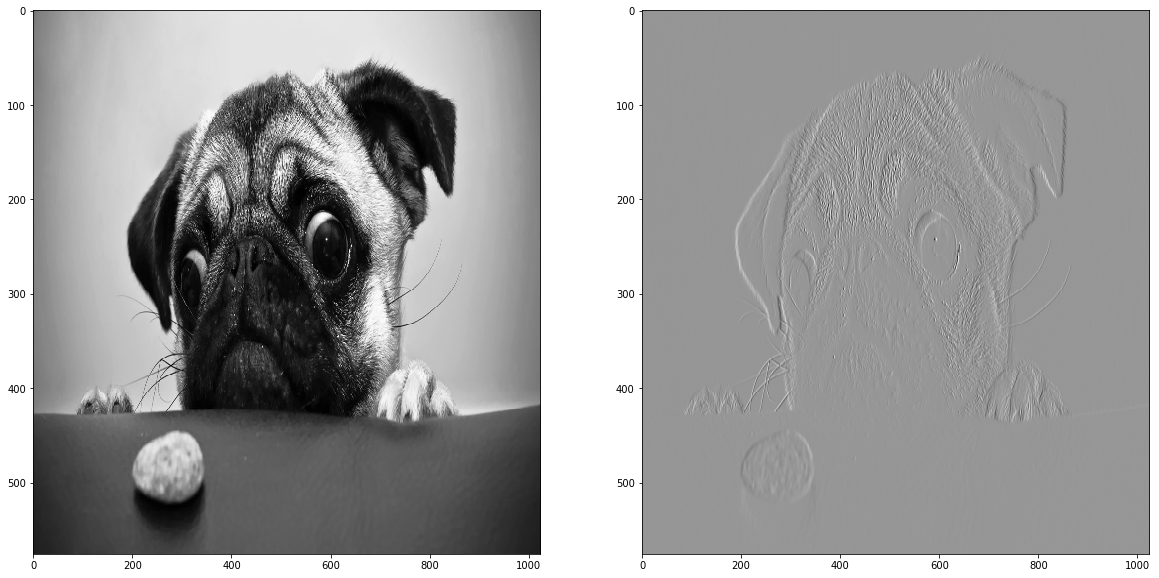

In [117]:
from scipy.signal import convolve2d

image = img.copy()
image = skimage.color.rgb2gray(image) #convert to greyscale to make it easier
image = (1 - image) #invert the color map to please matplotlib
inData = np.array(image)

filter_ = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

conv = convolve2d(inData, filter_, mode='same', boundary='fill', fillvalue=0)
conv = -1*conv/conv.max()

print("The images below show a filter that captures edges")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(inData, cmap='Greys', aspect='auto')
ax2.imshow(conv, cmap='Greys', aspect='auto')

### Examining the underlying components
While the above code gives a nice example of what a filter can do to an image, it obscures much of the underlying math. Here we will try to illuminate the inner workings of a convolutional layer to give a better understanding of how these layers operate at a basic level.

Just as the dense layer had a weight tensor, the convolutional layer can also be defined with a weight tensor. In order to get the weights for the convolutional layer as a single array, the input image must undergo a little manipulation. This is analogous to how the input image was flattened before the dense layer operated on the image.

### Walking through manually creating a convolutional layer
#### Get the input image

In [10]:
#get the image into a 250x250 pixel representation
image = transform.resize(img, (250, 250), mode='constant')
inData = np.array(image)

#### Format the input image
Recall that when we made a dense layer we needed to change the input array dimensions. In the case of the dense layer, we flattened the input array. For a convolutional layer the input image must also be altered for efficient computation, but the alteration is more complicated. Below we will demonstrate a function designed to prepare an input image for a convolutional layer.

In [29]:
def img_prep(in_, kernel_dim):
    """This function takes in an image array and the dimensions of a convolutional kernel.
    The stride is assumed to be one. The function outputs an array representation
    of the input image ready for input into a convolutional layer. This function is far from optimized.
    Instead it is presented to give insight into the process.
    """
    
    h, w, d = in_.shape
    h_steps = h - kernel_dim[0] + 1
    w_steps = w - kernel_dim[1] + 1
    num_patches = h_steps * w_steps
    
    #prepare the array that will hold the transformed image
    result = np.zeros((num_patches, kernel_dim[0] * kernel_dim[1] * d))
    count = 0
    for i in range(h_steps):
        for j in range(w_steps):
            holder = in_[i:i+kernel_dim[0], j:j+kernel_dim[1], :]
            holder = holder.flatten()
            result[count, :] = holder
            count += 1    
    return result 
    
kernel_size = (3, 3)
conv_in = img_prep(inData, kernel_size)
print("The image has been converted to a shape of: ", conv_in.shape)
    

The image has been converted to a shape of:  (61504, 27)


The above function has transformed the input array into a 2-D array. If it is not clear from the code above what is happening, hopefully the following will help visualize the approach:

<div>
<img src="https://s3.us-east-2.amazonaws.com/mxnet-zoo/public/im2col.png" style="width: 500px;">
<center>Credit Pete Warden</center>
</div>

Each patch in the image is a location where the convolutional filter is applied. These patches of data are flattened and placed as the rows in the resulting array.

The keen observer will notice that the shape of the above output has a total of $61,504 \times 27 =1,660,608$ elements whereas the input image only had $250 \times 250 \times 3 = 187,500$ elements. This is because we have repreated data from the image multiple times in the output array. While this is clearly very wasteful from a storage perspective, we will later demonstrate how this waste of space allows us to perform the whole convolutional computation with a single matrix multiplication.

#### Prepare the convolutional filters
To this point we have discussed on a single convolutional filter. In actuality an arbitrary number of filters can be applied within a single convolutional layer. The catch is that each filter must have the same dimensions. If you want to apply filters on your image with different dimensions, you will need to use multiple convolutional layers.

Below we will prepare an array holding 5 convolutional filters with the 3x3 pixel size specified above when preparing the image.

In [35]:
num_filters = 5

#we will initialize the filters to all ones since in practice humans don't choose the filters to use
#we let the computer optimize the filters
conv_weights = np.ones((kernel_size[0] * kernel_size[1] * inData.shape[-1], num_filters))
print("The convolutional weights have the following dimension: ", conv_weights.shape)


The convolutional weights have the following dimension:  (27, 5)


#### Apply the convolution
Now that we have the layers prepared, we can actually define the convolutional layer and apply it.

#### Questions
1. How many parameters does this convolutional layer have?
1. What is the primary determinant of the number of parameters?
1. How does this number of parameters compare to a dense network?
1. What is the shape of the output from the convolutional layer?
1. How can the output shape be determined?
1. Why does the output image look the way it does and should this be concerning?

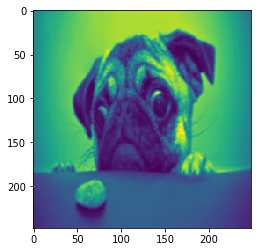

In [40]:
def conv0(in_, kernel_size, num_filters, stride=1):
    rows = np.floor((in_.shape[0] - kernel_size[0])/stride + 1).astype(int)
    cols = np.floor((in_.shape[1] - kernel_size[1])/stride + 1).astype(int)
    conv_in = img_prep(in_, kernel_size)
    conv_weights = np.ones((kernel_size[0] * kernel_size[1] * in_.shape[-1], num_filters))
    result = np.dot(conv_in, conv_weights)
    result = result.reshape((rows, cols, num_filters))
    
    return result
    
out_ = conv0(inData, kernel_size, num_filters)
plt.imshow(out_[:, :, 0])

## Pooling layers
We will not go into detail on pooling layers. Instead we will just provide a quick description. A pooling layer uses a filter similar to a convolutional layer. This filter slides over the image with a given kernel size and stride just like in a convolutional layer. The difference is that the actual filter part of the pooling layer is not an array but instead a function. The most common function choice returns the maximum value found in the filter at any given point. Similar to convolutional layers, the appliciation of this sliding window reduces the dimensionality of the input. The below image hopefully helps clarify the pooling layer.

<div>
<img src="https://s3.us-east-2.amazonaws.com/mxnet-zoo/public/Pooling_Simple_max.png">
<center>Credit leonardoaraujosantos.gitbooks.io</center>
</div>